In [ ]:
from urllib.request import urlopen
import urllib.parse
from bs4 import BeautifulSoup as Soup
import json
import time
import pandas as pd
import numpy as np
import datetime

from konlpy.tag import Kkma
from konlpy.utils import pprint
%matplotlib inline  

In [196]:
import MeCab

In [197]:
url = "https://play.google.com/store/getreviews?authuser=0"

In [194]:
headers = {
    'content-type' : 'application/x-www-form-urlencoded;charset=UTF-8',
    'user-gent' : 'Mozilla/5.0'
}

payload = {
    'id':"kr.co.nowcom.mobile.afreeca",
    'reviewType':0,
    'pageNum':0,
    'reviewSortOrder':4,
    "xhr":1,
    "hl":'ko'
}

In [ ]:
data = urllib.parse.urlencode(payload)
data = data.encode('utf-8')
with urllib.request.urlopen(url, data) as f:
    print(f.read().decode('utf-8')[5:])

In [390]:
req = urllib.request.urlopen(url, data)
data = urllib.parse.urlencode(payload)
data = data.encode('utf-8')
reviews = req.read().decode('utf-8')[5:]
reviews = json.loads(reviews)
soup = Soup(reviews[0][2])

In [396]:
reviewInfo = []
for i in range(3):
    payload['pageNum']=i
    req = urllib.request.urlopen(url, data)
    data = urllib.parse.urlencode(payload)
    data = data.encode('utf-8')
    reviews = req.read().decode('utf-8')[5:]
    reviews = json.loads(reviews)
    soup = Soup(reviews[0][2])
    for review in soup.select('.single-review'):
        row = []
        row.append(review.select('.review-body')[0].text[:-8])
        row.append( int(review.select('.current-rating')[0]['style'].split(':')[1].strip()[:-2])/20)
        date = review.select('.review-date')[0].text
        row.append(date)
        #row.append(date[0:4] + "-" + date[6:8] + "-" + date[10:12])
        row.append(review.select('.author-name')[0].text)
        reviewInfo.append(row)    
    time.sleep(3)

In [392]:
reviews = pd.DataFrame(columns=['text','score','date','author'], data=reviewInfo)

In [401]:
def convDate(date):
    cDate=""
    yyyy=""
    mm=""
    dd=""
    if "년" in date:
        yyyy = date.split("년")[0].split(" ")[0]
    if "월" in date:
        mm = date.split("월")[0].split(" ")[1]
    if "일" in date:
        dd = date.split("일")[0].split(" ")[2]
    
    cDate = datetime.datetime(int(yyyy),int(mm),int(dd))
    cDate.strftime('%Y-%m-%d')
    return cDate


reviews['date'] = reviews.apply(lambda row: convDate(row['date']), axis=1)

In [397]:
reviews = pd.read_pickle("/home/smile2x/nlp/data/afreeca_review.dat")

In [412]:
reviews.groupby("score").size()

score
1    2489
2     427
3     424
4     265
5     875
dtype: int64

In [409]:
review1 = reviews[(reviews['score']==1) | (reviews['score']==2)]

In [423]:
review1text = []
reviewText = ""
for index,row in review1.iterrows():
    #review1text.append(t["text"])
    reviewText += row["text"]    

In [430]:
from konlpy.tag import Twitter; t = Twitter()
afreeca_review = t.morphs(reviewText)

In [431]:
afreeca = nltk.Text(afreeca_review,name='afreecatv_app_review')
print(len(afreeca.tokens))       # returns number of tokens (document length)
print(len(set(afreeca.tokens)))  # returns number of unique tokens
afreeca.vocab()                  # returns frequency distribution

80371
7202


Counter({'늦게': 1,
         '된': 45,
         '킴': 1,
         '이름': 13,
         '방폭': 1,
         '똑같': 24,
         'koo': 4,
         '로스트사가': 1,
         'ge': 8,
         '래야': 2,
         '메뉴': 6,
         '이던': 1,
         '복사해서': 1,
         '대륙': 1,
         '미성': 1,
         '받': 12,
         '거만': 7,
         '이구': 1,
         '먹잖': 1,
         '버리는': 3,
         '는데도': 20,
         '업뎃하라': 1,
         '노트': 41,
         '많더': 1,
         '부탁드릴': 3,
         '닉네임': 15,
         '기록': 5,
         '시작': 6,
         '자책': 1,
         '닉넴바뀌': 1,
         '심각함': 2,
         '생중계': 1,
         '크기': 1,
         '있길': 2,
         '몬초짜리들': 1,
         '로는': 10,
         '원래': 19,
         '업자': 2,
         '팅구': 2,
         '염두': 1,
         '내버리': 1,
         '있잖': 4,
         '버리니': 2,
         '서도': 1,
         '왓더퍽': 1,
         '왜만듬': 2,
         '키': 25,
         '고하': 6,
         '업뎃망함': 1,
         '프로세스': 1,
         '고픈': 1,
         'ㅅ': 14,
         '서': 385,
         '뭐

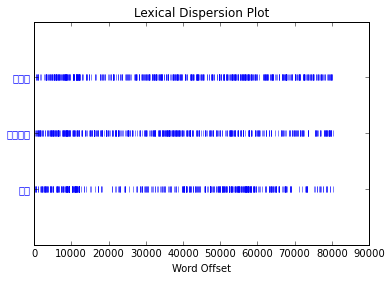

In [438]:
afreeca.dispersion_plot(['버퍼링', '업데이트', '버퍼'])

In [439]:
afreeca.concordance('업데이트')

Displaying 25 of 603 matches:
 심해 진짜 0 퍼 에서 나아가질 않아 좀 고칠 수 없냐 ? 이번 업데이트 후 에 버퍼 가 너무 심하고 화면 이 밀려 서 나오는 현상 이 있
이 터지 네 ? 근데 이 게 특히 많이 되는 날 이 있어 요 바로 업데이트 직후 ~ 며칠 지나면 심각하다 가 ? 다시 줄어들 고 또 업데이트
업데이트 직후 ~ 며칠 지나면 심각하다 가 ? 다시 줄어들 고 또 업데이트 하면 ??... 결론 은 감사 드리는 데 제 가 말한 저 문제점 
 니까 폭탄 터지 네 짜증 나게 업뎃하 니깐 아디 정지 되 있 음 업데이트 하기 전 까지는 잘만 봤 는데 갑자기 이 용정 지 됬 는 데요 .
 딱 끊겨 서 재생 이 되 죠 ..? 다시 보기 동영상 팅김 문제 업데이트 된 이후 로 와이파이 도 빵빵 한 데 다시 보기 동영상 보면 계속
송 을 볼 수 가업 네 요 심지어 데이터 를 켜도 말 입니 다 . 업데이트 제대로 해주시 죠 아니 정지 먹인 이유 좀 채팅 에서 욕한 적도 
 채팅 만 보이 고 버퍼링 때문 에 방송 화면 이 안 보이 잖 아 업데이트 하고 모바일 고화질 로 볼 수 있 는 방송 이 없어 광고 작작 안
금 버퍼 걸리는 것 정도 는 괜찮 았 었 는데 모바일 매니저 기능 업데이트 이후 너무 심합 니다 방송 을 아예 못 볼 정도 네 요 .. 이건
꺼 뜨 고 있 고 버퍼 는 0 % 올라가지 고 않고 ㅉㅉ 이다 왜 업데이트 하지 ? 이 딴 식 으로 할 거 면 걍 내비 두지 맨날 업데이트 
 업데이트 하지 ? 이 딴 식 으로 할 거 면 걍 내비 두지 맨날 업데이트 업데이트 완전 시도 때 도 없이 하내 그러 고 하 면할 때 마다 
 하지 ? 이 딴 식 으로 할 거 면 걍 내비 두지 맨날 업데이트 업데이트 완전 시도 때 도 없이 하내 그러 고 하 면할 때 마다 다른 문재
재점 은 맨날 생기 고 그 전업 데이트 문제점 은 다 고치 고 또 업데이트 하는 건가 ? 영정 이라 뇨 ? 지금 까지 방송 해온 것 들 은 
한번 부탁드립니 다 정상 이용 가능할 때

In [440]:
afreeca.similar("업데이트")

업뎃 광고 버퍼 정지 아프리카 패치 버퍼링 관리 내 소리 진짜 오류 아프리카티비 쓸데없 제대로 뭐 수정 와이파이 안 방송


In [366]:
m = MeCab.Tagger ('-d /usr/local/lib/mecab/dic/mecab-ko-dic')
print (m.parse ( "장난하냐 버퍼링 개선안할래? 두시간을처하고있어무슨ㅡㅡ 안봐개ㅅㅐ끼들아"))

장난	NNG,*,T,장난,*,*,*,*
하	XSV,*,F,하,*,*,*,*
냐	EC,*,F,냐,*,*,*,*
버퍼링	NNP,*,T,버퍼링,*,*,*,*
개선	NNG,*,T,개선,*,*,*,*
안	MAG,성분부사/부정부사,T,안,*,*,*,*
할래	VV+EF,*,F,할래,Inflect,VV,EF,하/VV/*+ᆯ래/EF/*
?	SF,*,*,*,*,*,*,*
두	MM,~가산명사,F,두,*,*,*,*
시간	NNG,*,T,시간,*,*,*,*
을	JKO,*,T,을,*,*,*,*
처하	VV,*,F,처하,*,*,*,*
고	EC,*,F,고,*,*,*,*
있	VX,*,T,있,*,*,*,*
어	EC,*,F,어,*,*,*,*
무슨	MM,~비인성명사,T,무슨,*,*,*,*
ㅡㅡ	UNKNOWN,*,*,*,*,*,*,*
안	MAG,성분부사/부정부사,T,안,*,*,*,*
봐	VV+EC,*,F,봐,Inflect,VV,EC,보/VV/*+아/EC/*
개	NNG,*,F,개,*,*,*,*
ㅅ	NNG,*,F,ㅅ,*,*,*,*
ㅐ끼들아	UNKNOWN,*,*,*,*,*,*,*
EOS



In [367]:
kkma = Kkma()

pprint(kkma.pos("장난하냐 버퍼링 개선안할래? 두시간을처하고있어무슨ㅡㅡ 안봐개ㅅㅐ끼들아"))

[('장난', 'NNG'),
 ('하', 'XSV'),
 ('냐', 'EFQ'),
 ('버퍼', 'NNG'),
 ('링', 'NNG'),
 ('개선', 'NNG'),
 ('안', 'NNG'),
 ('하', 'XSV'),
 ('ㄹ래', 'EFQ'),
 ('?', 'SF'),
 ('두', 'MDN'),
 ('시간', 'NNG'),
 ('을', 'JKO'),
 ('처하', 'VV'),
 ('고', 'ECE'),
 ('있', 'VXV'),
 ('어', 'ECD'),
 ('무슨', 'MDT'),
 ('ㅡㅡ', 'EMO'),
 ('안봐개ㅅㅐ끼들', 'UN'),
 ('아', 'JKI')]


In [371]:
from konlpy.corpus import kobill
docs_ko = [kobill.open(i).read() for i in kobill.fileids()]

from konlpy.tag import Twitter; t = Twitter()
pos = lambda d: ['/'.join(p) for p in t.pos(d, stem=True, norm=True)]
texts_ko = [pos(doc) for doc in docs_ko]

from gensim import corpora
dictionary_ko = corpora.Dictionary(texts_ko)
dictionary_ko.save('ko.dict')  # save dictionary to file for future use

In [ ]:
from gensim import models
tf_ko = [dictionary_ko.doc2bow(text) for text in texts_ko]
tfidf_model_ko = models.TfidfModel(tf_ko)
tfidf_ko = tfidf_model_ko[tf_ko]
corpora.MmCorpus.serialize('ko.mm', tfidf_ko) # save corpus to file for future use

# print first 10 elements of first document's tf-idf vector
print(tfidf_ko.corpus[0][:10])
# print top 10 elements of first document's tf-idf vector
print(sorted(tfidf_ko.corpus[0], key=lambda x: x[1], reverse=True)[:10])
# print token of most frequent element
print(dictionary_ko.get(414))